In [3]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("bengaluru_house_prices.csv")
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df.describe()


,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [38]:
for column in df.columns:
    count=df[column].value_counts()
    print(count)


area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64
size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          

In [6]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [8]:
df["location"]=df["location"].dropna()
df["bath"]=df["bath"].dropna()
df["balcony"]=df["balcony"].dropna()
df["size"]=df["size"].dropna()
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [9]:
df.duplicated().sum()

529

In [5]:
dfd=df.drop_duplicates()
dfnew=dfd.drop(columns="society")
dfd
dfnew

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00


In [ ]:
dfnew.to_csv(new_cleaned_dataset.csv,index=F

In [11]:
dfnew.describe(include="all")

,area_type,availability,location,size,total_sqft,bath,balcony,price
count,12791,12791,12790,12775,12791,12718.000000,12186.000000,12791.000000
unique,4,81,1305,31,2117,NaN,NaN,NaN
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,1200,NaN,NaN,NaN
freq,8317,10172,523,4931,808,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,2.708602,1.582308,114.317646
std,NaN,NaN,NaN,NaN,NaN,1.357764,0.822536,151.480310
min,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,8.000000
25%,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,50.000000
50%,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,73.000000
75%,NaN,NaN,NaN,NaN,NaN,3.000000,2.000000,121.000000


In [12]:
dfnew.describe()

,bath,balcony,price
count,12718.000000,12186.000000,12791.000000
mean,2.708602,1.582308,114.317646
std,1.357764,0.822536,151.480310
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,73.000000
75%,3.000000,2.000000,121.000000
max,40.000000,3.000000,3600.000000


In [13]:
dfnew.columns

Index(['area_type', 'availability', 'location', 'size', 'total_sqft', 'bath',
       'balcony', 'price'],
      dtype='object')

In [14]:
dfnew["location"].describe()

count          12790
unique          1305
top       Whitefield
freq             523
Name: location, dtype: object

In [15]:
dfnew["location"].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [16]:
dfnew["location"].value_counts()

location
Whitefield                        523
Sarjapur  Road                    379
Electronic City                   287
Kanakpura Road                    249
Thanisandra                       229
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [17]:
df2=dfnew.sort_values(by="location",ascending=False)
df2.head(5)

,area_type,availability,location,size,total_sqft,bath,balcony,price
4586,Super built-up Area,20-Dec,whitefiled,2 BHK,935,2.0,1.0,32.73
3483,Plot Area,Ready To Move,"white field,kadugodi",6 Bedroom,2100,6.0,NaN,275.00
11013,Super built-up Area,Ready To Move,vinayakanagar,7 BHK,1200,5.0,2.0,200.00
9683,Plot Area,18-Apr,tc.palya,3 Bedroom,1400,2.0,1.0,78.00
5428,Plot Area,18-Apr,tc.palya,2 Bedroom,1020,2.0,1.0,62.00


In [18]:
dfnew["availability"].describe()

count             12791
unique               81
top       Ready To Move
freq              10172
Name: availability, dtype: object

In [19]:
dfnew["availability"].value_counts()

availability
Ready To Move    10172
18-May             292
18-Dec             284
18-Apr             269
18-Aug             187
                 ...  
16-Oct               1
15-Dec               1
15-Jun               1
16-Jul               1
14-Jul               1
Name: count, Length: 81, dtype: int64

In [20]:
df1=dfnew.sort_values(by="availability",ascending=False)
df1.head(5)

,area_type,availability,location,size,total_sqft,bath,balcony,price
6537,Super built-up Area,Ready To Move,Hegde Nagar,3 BHK,1835,3.0,3.0,88.0
7259,Super built-up Area,Ready To Move,Kasavanhalli,3 BHK,1380,2.0,2.0,55.0
7262,Super built-up Area,Ready To Move,Chandapura,2 BHK,922,2.0,1.0,36.0
7263,Built-up Area,Ready To Move,Nagappa Reddy Layout,2 BHK,1200,2.0,2.0,43.2
7264,Super built-up Area,Ready To Move,Nagadevanahalli,3 BHK,1240,2.0,2.0,65.0


In [21]:
dfnew["area_type"].value_counts()

area_type
Super built-up  Area    8317
Built-up  Area          2398
Plot  Area              1989
Carpet  Area              87
Name: count, dtype: int64

In [22]:
dfnew["area_type"].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [23]:
df6=dfnew.sort_values(by="area_type",ascending=False)
df6


,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
7813,Super built-up Area,Ready To Move,GM Palaya,3 BHK,1315,3.0,1.0,65.00
7802,Super built-up Area,Ready To Move,Hebbal,4 BHK,3900,4.0,2.0,410.00
7803,Super built-up Area,Ready To Move,Old Madras Road,2 BHK,1300,2.0,2.0,100.00
7804,Super built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1419,2.0,1.0,60.42
...,...,...,...,...,...,...,...,...
6028,Built-up Area,Ready To Move,Banashankari,6 BHK,1200,6.0,2.0,180.00
3947,Built-up Area,18-May,Sarjapur Road,4 Bedroom,3369 - 3464,6.0,0.0,143.00
11139,Built-up Area,Ready To Move,Hosahalli Extension,5 Bedroom,2000,5.0,2.0,240.00
11142,Built-up Area,Ready To Move,Munnekollal,10 Bedroom,7200,10.0,3.0,200.00


In [24]:
dfnew["total_sqft"].value_counts()

total_sqft
1200           808
1100           210
1500           202
2400           196
600            178
              ... 
2563 - 2733      1
2005             1
605 - 624        1
4260 - 4408      1
4689             1
Name: count, Length: 2117, dtype: int64

In [25]:
df3=dfnew.sort_values(by="total_sqft",ascending=False)
df3.head(5)

,area_type,availability,location,size,total_sqft,bath,balcony,price
1369,Built-up Area,Ready To Move,BEML Layout,2 BHK,999,2.0,3.0,45.00
10519,Super built-up Area,Ready To Move,Dommasandra,2 BHK,999,2.0,2.0,32.90
5256,Super built-up Area,19-Jan,Mailasandra,2 BHK,999,2.0,1.0,43.66
9763,Super built-up Area,Ready To Move,Ganga Nagar,2 BHK,998,2.0,2.0,65.00
4815,Super built-up Area,Ready To Move,Kaval Byrasandra,2 BHK,997,2.0,3.0,53.00


In [26]:
dfnew["bath"].value_counts()

bath
2.0     6546
3.0     3180
4.0     1198
1.0      762
5.0      520
6.0      271
7.0      102
8.0       64
9.0       42
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: count, dtype: int64

In [27]:
dfnew["balcony"].value_counts()

balcony
2.0    4846
1.0    4700
3.0    1630
0.0    1010
Name: count, dtype: int64

In [28]:
dfnew["price"].value_counts()

price
75.00     300
65.00     296
55.00     265
60.00     263
45.00     231
         ... 
40.98       1
27.54       1
84.95       1
63.98       1
488.00      1
Name: count, Length: 1994, dtype: int64

In [29]:
df4=dfnew.sort_values(by="price",ascending=False)
df4.head(5)

,area_type,availability,location,size,total_sqft,bath,balcony,price
13067,Plot Area,Ready To Move,Defence Colony,10 Bedroom,7150,13.0,NaN,3600.0
11080,Super built-up Area,18-Jan,Ashok Nagar,4 BHK,8321,5.0,2.0,2912.0
13200,Plot Area,Ready To Move,Defence Colony,6 Bedroom,8000,6.0,3.0,2800.0
11763,Plot Area,Ready To Move,Sadashiva Nagar,5 Bedroom,9600,7.0,2.0,2736.0
3180,Super built-up Area,Ready To Move,Shanthala Nagar,5 BHK,8321,5.0,3.0,2700.0


In [30]:
dfnew["size"].value_counts()

size
2 BHK         4931
3 BHK         4120
4 Bedroom      824
4 BHK          574
3 Bedroom      535
1 BHK          521
2 Bedroom      314
5 Bedroom      291
6 Bedroom      191
1 Bedroom      104
8 Bedroom       84
7 Bedroom       82
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [31]:
dfnew.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [32]:
dfnew.shape

(12791, 8)

In [38]:
for column in df.columns:
    count=df[column].value_counts()
    print(count)


area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64
size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          

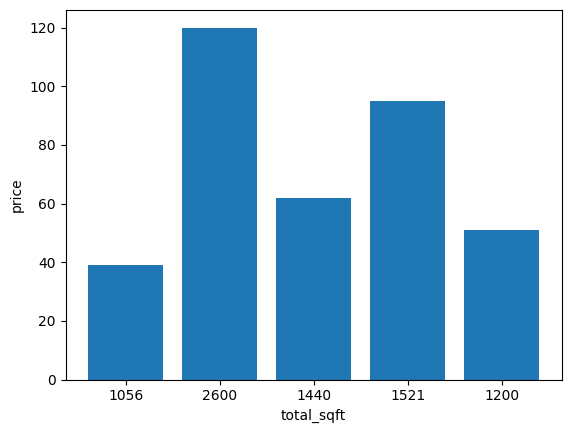

In [33]:
x=dfnew["total_sqft"].head(5)
y=dfnew["price"].head(5)
plt.bar(x,y)
plt.xlabel("total_sqft")
plt.ylabel("price")
plt.show()

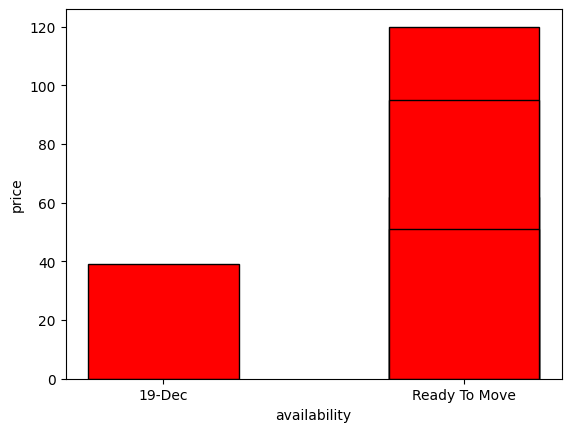

<Figure size 1000x700 with 0 Axes>

In [34]:
a=dfnew["price"].head(5)
b=dfnew["availability"].head(5)
c=dfnew["location"].head(5)
plt.bar(b,a,color="r",width=0.5,edgecolor="black")
plt.xlabel("availability")
plt.ylabel("price")
plt.figure(figsize=(10,7),dpi=100)
plt.show()

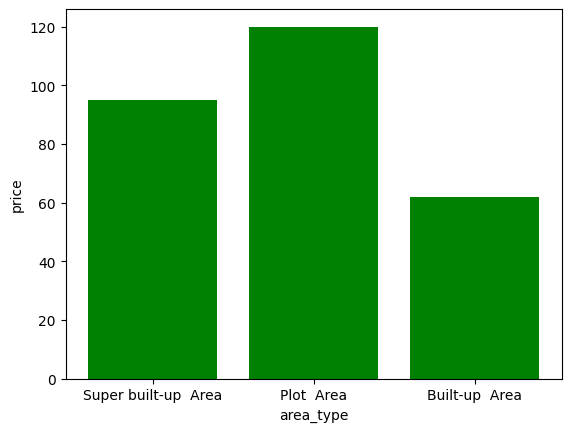

In [35]:
w=dfnew["area_type"].head(5)
plt.bar(w,a,color="g")
plt.xlabel("area_type")
plt.ylabel("price")
plt.show()

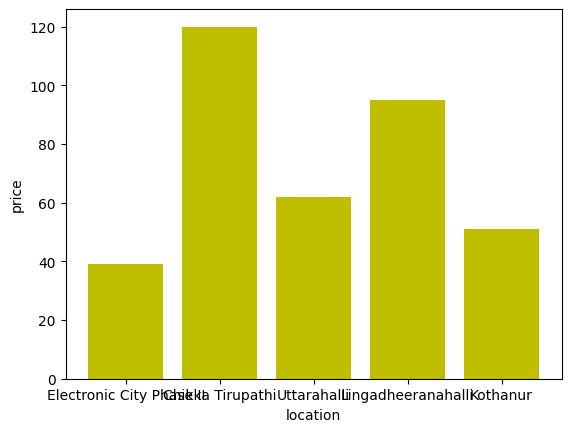

In [36]:
plt.bar(c,a,color="y")
plt.xlabel("location")
plt.ylabel("price")
plt.show()

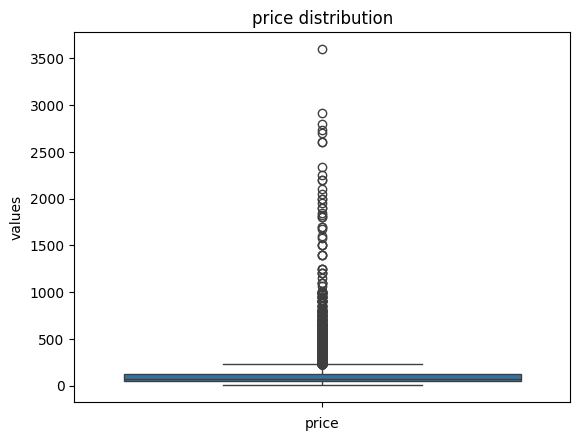

In [52]:
price=dfnew["price"]
plt.boxplot(price)
plt.xlabel("price")
plt.ylabel("values")
plt.title("price distribution")
plt.show()

In [6]:
dfnew["bhk"]=dfnew["size"].str.split().str.get(0).astype(float)
dfnew

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,2.0
...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00,3.0
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.00,5.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,NaN,400.00,4.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00,2.0


In [40]:
dfnew.describe()

,bath,balcony,price,bhk
count,12718.000000,12186.000000,12791.000000,12775.000000
mean,2.708602,1.582308,114.317646,2.817847
std,1.357764,0.822536,151.480310,1.311841
min,1.000000,0.000000,8.000000,1.000000
25%,2.000000,1.000000,50.000000,2.000000
50%,2.000000,2.000000,73.000000,3.000000
75%,3.000000,2.000000,121.000000,3.000000
max,40.000000,3.000000,3600.000000,43.000000


In [9]:
dfnew["bhk"].describe()

count    12775.000000
mean         2.817847
std          1.311841
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         43.000000
Name: bhk, dtype: float64

In [42]:
dfnew["bath"].describe()

count    12718.000000
mean         2.708602
std          1.357764
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         40.000000
Name: bath, dtype: float64

In [43]:
dfnew["balcony"].describe()

count    12186.000000
mean         1.582308
std          0.822536
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: balcony, dtype: float64

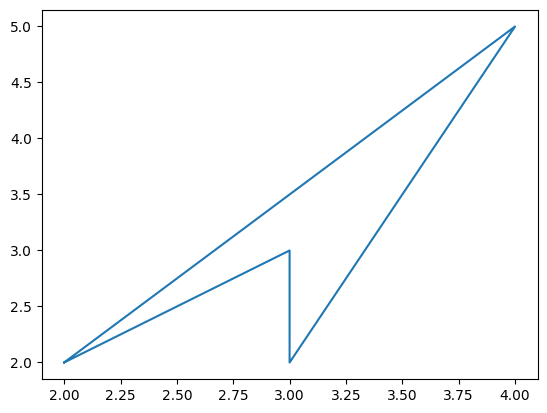

In [36]:
u=dfnew["bhk"].head(5)
v=dfnew["bath"].head(5)
q=dfnew["balcony"].head(5)
plt.plot(u,v)
plt.xlabel("no.of bhk")
plt.ylabel("no.of bathrooms")
plt.show()

In [42]:
c=u.corr(v)
d=u.corr(q)
print("correlation btw no of bhk and no of bathrooms is",c, "and correlation btw no.of bhk and no.of balconies is",d)


correlation btw no of bhk and no of bathrooms is 0.8708635721768005 and correlation btw no.of bhk and no.of balconies is 0.7637626158259733


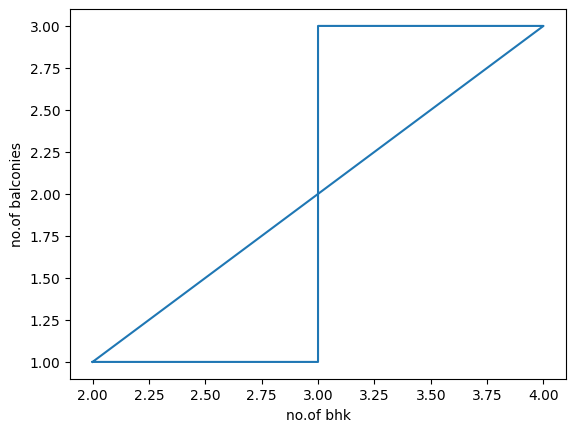

In [37]:
plt.plot(u,q)
plt.xlabel("no.of bhk")
plt.ylabel("no.of balconies")
plt.show()

In [44]:
dfnew["area_type"].describe()

count                    12791
unique                       4
top       Super built-up  Area
freq                      8317
Name: area_type, dtype: object

In [10]:
dfnew["price_per_sqft"]=dfnew["price"]*100000/dfnew["total_sqft"]
dfnew

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2.0,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4.0,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3.0,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3.0,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2.0,4250.000000
...,...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.00,3.0,6530.612245
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5.0,6689.834926
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600.0,5.0,NaN,400.00,4.0,11111.111111
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2.0,5258.545136


In [11]:
dfnew.to_csv("final dataset.csv",index=False)

In [12]:
dfnew["price_per_sqft"].describe()

count    1.274500e+04
mean     8.022896e+03
std      1.086134e+05
min      2.678298e+02
25%      4.298559e+03
50%      5.482304e+03
75%      7.398708e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

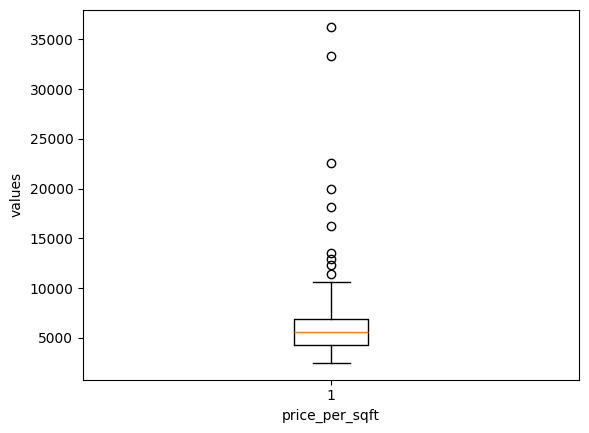

In [13]:
price_per_sqft=dfnew["price_per_sqft"].head(100)
plt.boxplot(price_per_sqft)
plt.xlabel("price_per_sqft")
plt.ylabel("values")
plt.show()

In [52]:
corr=dfnew["price_per_sqft"].corr(dfnew["total_sqft"])
print(corr)

-0.0085659715435061


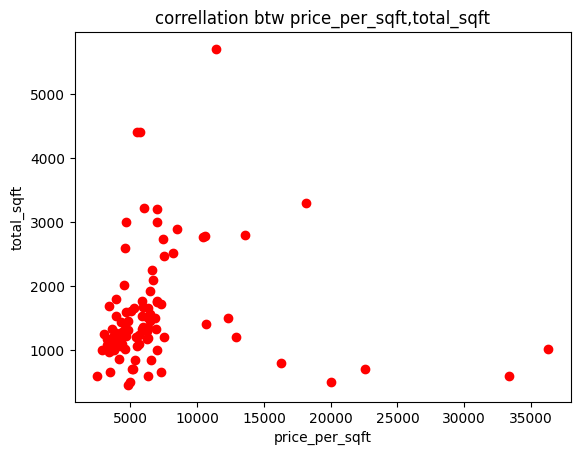

In [53]:
total_sqft=dfnew["total_sqft"].head(100)
plt.scatter(price_per_sqft,total_sqft,color="r")
plt.xlabel("price_per_sqft")
plt.ylabel("total_sqft")
plt.title("correllation btw price_per_sqft,total_sqft")
plt.show()

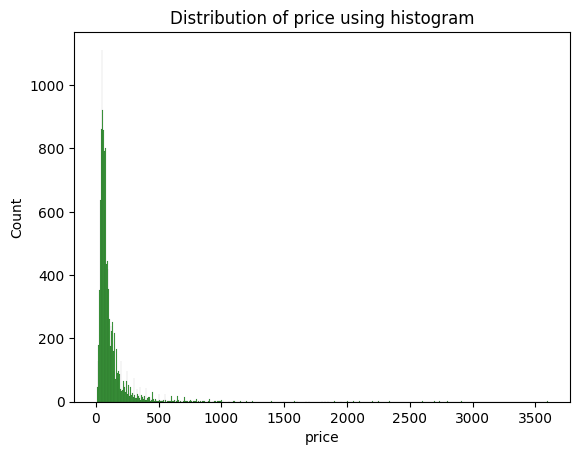

In [14]:
# Visualize the distribution of prices using a histogram
sns.histplot(dfnew['price'], kde=False,color="g")
plt.title("Distribution of price using histogram")
plt.show()


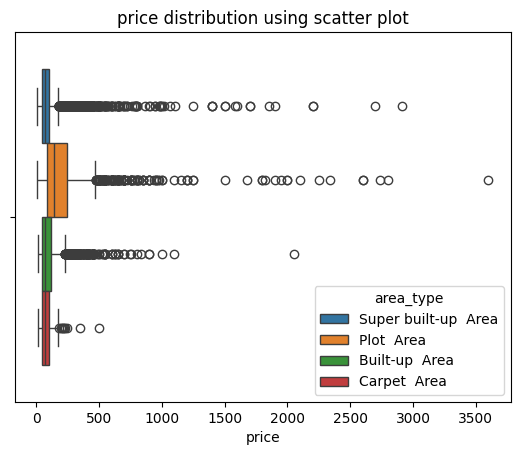

In [61]:
sns.boxplot(x="price",data=dfnew,hue="area_type")
plt.title("price distribution using scatter plot")
plt.show()

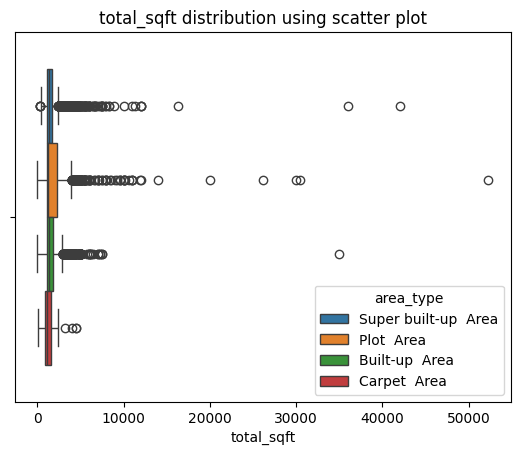

In [60]:
sns.boxplot(x="total_sqft",data=dfnew,hue="area_type")
plt.title("total_sqft distribution using scatter plot")
plt.show()

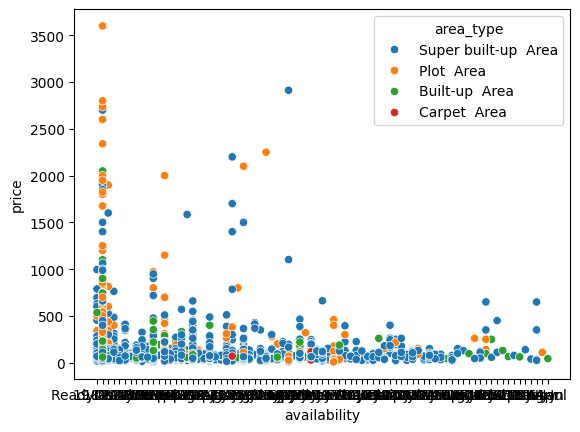

In [55]:
sns.scatterplot(x="availability",y="price",hue="area_type",data=dfnew)
plt.show()


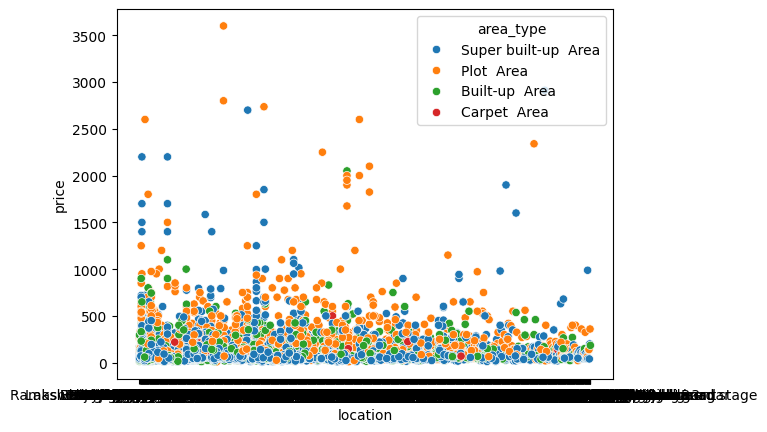

In [56]:
sns.scatterplot(x="location",y="price",hue="area_type",data=dfnew)
plt.show()

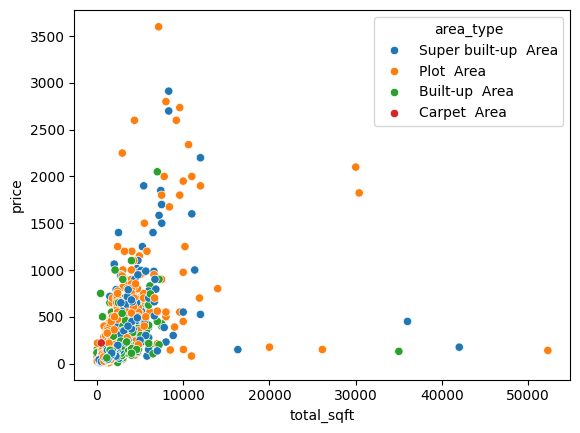

In [57]:
sns.scatterplot(x="total_sqft",y="price",hue="area_type",data=dfnew)
plt.show()

In [ ]:
sns.boxplot(x="price",y="total_sqft",hue="are_Type",data=dfnew)
plt.show()
     

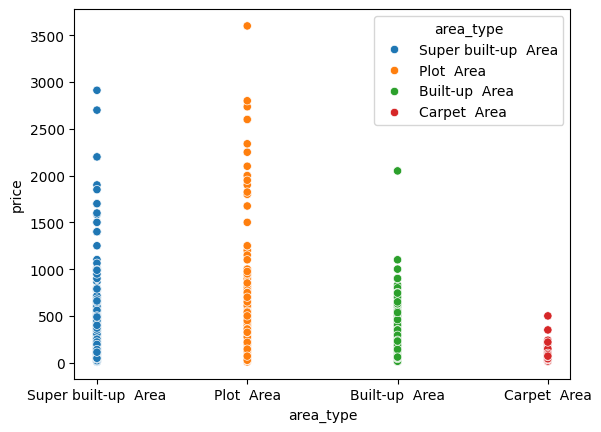

In [58]:
sns.scatterplot(x="area_type",y="price",hue="area_type",data=dfnew)
plt.show()

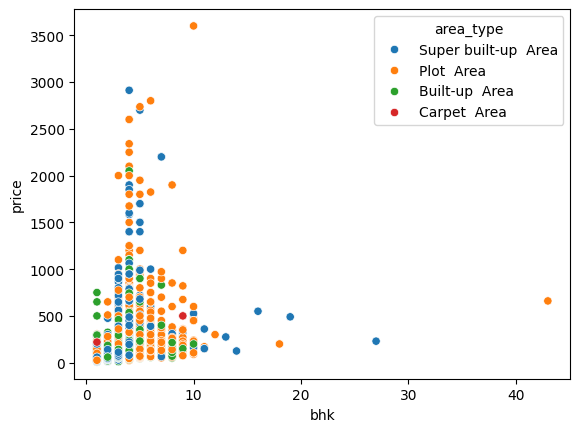

In [10]:
import seaborn as sns
sns.scatterplot(x="bhk",y="price",hue="area_type",data=dfnew)
plt.show()

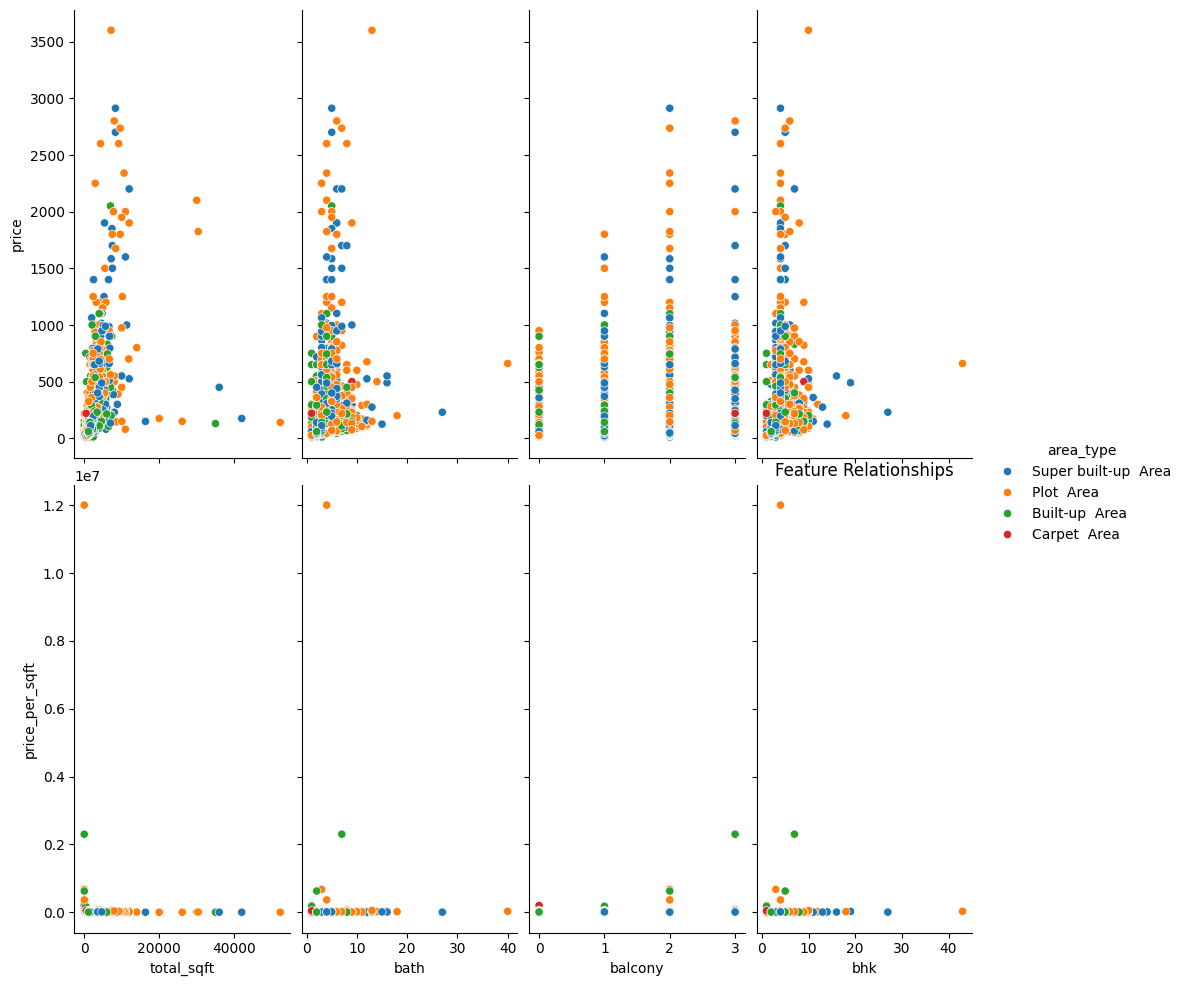

In [66]:
# Visualize feature relationships using a pair plot
sns.pairplot(dfnew, x_vars=['total_sqft', 'bath', 'balcony','bhk'], y_vars=['price','price_per_sqft'],hue="area_type", height=5, aspect=0.5)
plt.title("Feature Relationships")
plt.show()


In [22]:
# Droping string data columns to find proper relationship
dfnum = dfnew.drop(["size","area_type","availability","location"],axis=1)
dfnum

,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,1056.0,2.0,1.0,39.07,2.0,3699.810606
1,2600.0,5.0,3.0,120.00,4.0,4615.384615
2,1440.0,2.0,3.0,62.00,3.0,4305.555556
3,1521.0,3.0,1.0,95.00,3.0,6245.890861
4,1200.0,2.0,1.0,51.00,2.0,4250.000000
...,...,...,...,...,...,...
13314,1715.0,3.0,3.0,112.00,3.0,6530.612245
13315,3453.0,4.0,0.0,231.00,5.0,6689.834926
13316,3600.0,5.0,NaN,400.00,4.0,11111.111111
13317,1141.0,2.0,1.0,60.00,2.0,5258.545136


In [23]:
#correlation
corr = dfnum.corr()
corr

,total_sqft,bath,balcony,price,bhk,price_per_sqft
total_sqft,1.000000,0.389166,0.146307,0.574008,0.344903,-0.008566
bath,0.389166,1.000000,0.200387,0.453099,0.899376,0.030568
balcony,0.146307,0.200387,1.000000,0.118645,0.183655,0.021663
price,0.574008,0.453099,0.118645,1.000000,0.395126,0.027975
bhk,0.344903,0.899376,0.183655,0.395126,1.000000,0.030604
price_per_sqft,-0.008566,0.030568,0.021663,0.027975,0.030604,1.000000


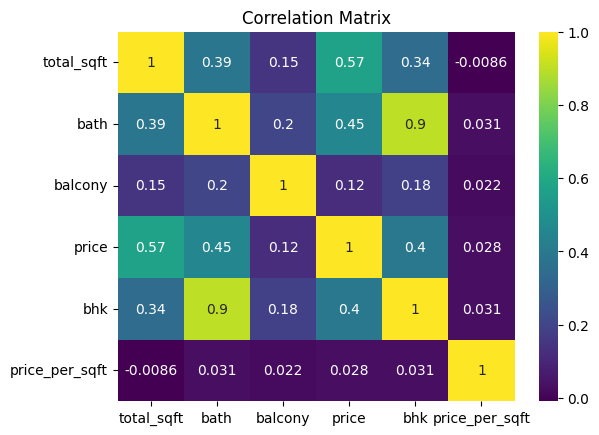

In [25]:
# Visualize correlation using a correlation matrix graph
sns.heatmap(corr, annot=True, cmap='viridis')
plt.title("Correlation Matrix")
plt.show()


port folio project on bengaluru house prices data set.
Data preprocessing,data cleaning,data exploration,data visualisation etc. has been done in this data set with the help of libraries numpy,pandas,matplotlib pyplot, and scatter plot.
data visualisation through bar plot,scatterplot,lineplot,boxplot is done with the help of matplotlib pyplot.
data visualisation through scatter plot,histogram,box plot,pair plot ,heat map is done with the help of scatter plot.
